K-Means Silhouette Score: 0.25
GMM (EM) Silhouette Score: 0.25


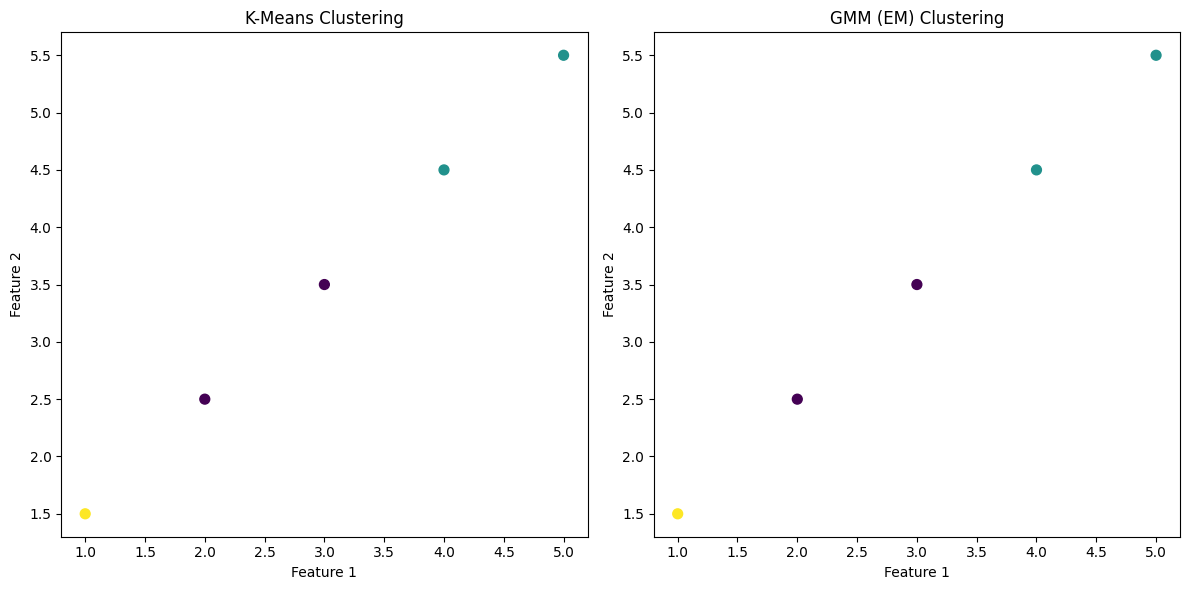

In [5]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data from a CSV file
# Replace 'data.csv' with your actual file name
file_path = 'data.csv'

# Create a sample data.csv file for testing
sample_data = pd.DataFrame({
	'Feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
	'Feature2': [1.5, 2.5, 3.5, 4.5, 5.5],
	'Feature3': [2.0, 3.0, 4.0, 5.0, 6.0]
})
sample_data.to_csv(file_path, index=False)

data = pd.read_csv(file_path)

# Assume the dataset has numerical columns only
# If preprocessing is required (e.g., removing categorical columns), handle it here
X = data.select_dtypes(include=[np.number])

# Perform clustering using K-Means
k = 3  # Number of clusters (adjust based on your dataset)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Perform clustering using Gaussian Mixture Model (EM Algorithm)
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Compare results using silhouette score
kmeans_silhouette = silhouette_score(X, kmeans_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"GMM (EM) Silhouette Score: {gmm_silhouette:.2f}")

# Visualize the clustering results
plt.figure(figsize=(12, 6))

# K-Means clustering plot
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# GMM clustering plot
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title("GMM (EM) Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()
